### 2.2.1 解析数据：从文本文件中解析数据
#### 程序清单2-2 将文本记录转换为Numpy数据的程序

In [36]:
import numpy as np


def file2martrix(filename):
    fr=open(filename)
    numOfLines=1000    # 样本个数
    returnMat=np.zeros((numOfLines,3))    # X
    classLabelVec=[]    # y
    index=0    # 当前行数
    
    for line1 in fr.readlines():    # readlines()只可以使用一次
        line=line1.strip().split("\t")
        returnMat[index,:]=np.array([float(ele) for ele in line[:3]])
        index+=1
        classLabelVec.append(int(line[-1]))
    fr.close()
    return returnMat,classLabelVec

In [37]:
X, y = file2martrix('D:\\机器学习实战代码\\machinelearninginaction\\Ch02\\datingTestSet2.txt')
X.shape


(1000, 3)

### 2.2.2 分析数据：使用Matplotlib绘制散点图
#### 为了了解数据的分布规律和真实含义，直接查看数据本身不友好，所以需要可视化出来
#### 你可以像下面这样，直接将点可视化出来：

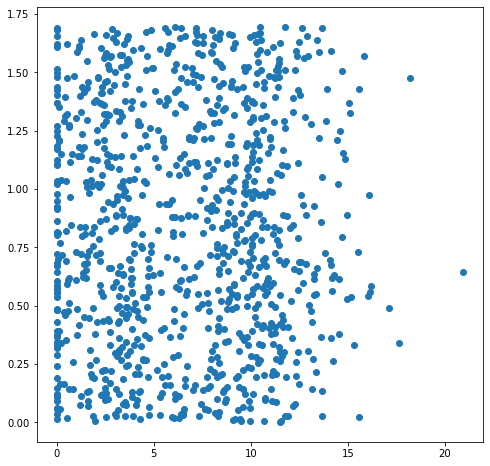

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,8))
plt.scatter(X[:,1],X[:,2])
plt.show()

#### 但是很明显，你什么有用的信息也得不到
#### 所以，需要将代码做出如下更改：

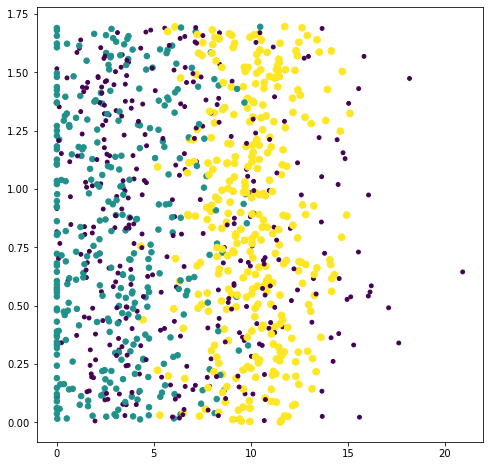

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 1], X[:, 2], s=15.0*np.array(y),c=15.0*np.array(y),)
plt.show()


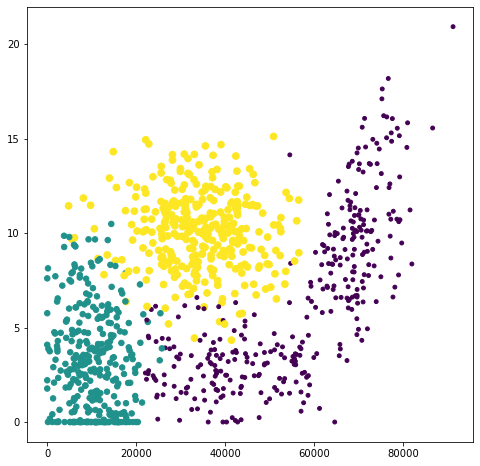

In [52]:
# 选择其他两个特征进行可视化
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=15.0*np.array(y), c=15.0*np.array(y),)
plt.show()

In [53]:
# 这两个特征分类的效果还是比较清楚的

### 2.2.3 准备数据：归一化数值
- 在计算距离时，如果某个特征数量级过大，则会作为主导特征
- 我们通常认为所有特征的重要性应该是平等的
- 这就是归一化的必要性
#### 程序清单2-3 归一化特征值

In [54]:
def autoNorm(dataSet):
    """仅对X进行归一化"""
    minVal=dataSet.min(0)    # axis=0
    maxVal=dataSet.max(0) # axis=0
    ranges=maxVal-minVal
    
    normed_dataset=(dataSet-minVal)/(maxVal-minVal)
    
    return normed_dataset,ranges,minVal


autoNorm(X)

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

In [64]:
def classify0(X, dataSet, labels, k):
    """
    X:待测样本,待分类样本
    dataSet:已有样本数据
    labels:已有样本标签
    k:近邻个数
    """
    # 计算距离
    diffMat = dataSet-X    # 利用广播，计算差
    diffSquare = diffMat**2    # 各项平方
    distances = np.sqrt(diffSquare.sum(axis=1))    # 求和 然后开方

    # 按照距离，从小到大排序
    disIdx = distances.argsort()

    classCount = {}    # 用于保存每一类的样本个数（前k个之中）
    for i in range(k):
        label = labels[disIdx[i]]    # 第I个样本的标签
        classCount[label] = classCount.get(label, 0)+1    # 字典获取label对应的值，自增1

    keys = np.array([key for key in classCount.keys()])
    value = np.array([val for val in classCount.values()])

    val_argmax = value.argmax()

    return keys[val_argmax]


def datingClassTest():
    hoRatio=0.01
    X_s=autoNorm(X)[0]
    numTest=int(hoRatio*X_s.shape[0])    # 测试样本的数量
    errorCount=0    # 误分类样本个数
    
    for i in range(numTest):
        classifyResult=classify0(X_s[i,:],X_s[i:X_s.shape[0],:],y,k=3)    # kNN算法实施
        print('the classify result is %s,the true label is %s'%(classifyResult,y[i]))
        
        if classifyResult!=y[i]:
            errorCount+=1
        
        print('the total error rate is : %s'%(errorCount/X_s.shape[0]))
        
        
datingClassTest()


the classify result is 3,the true label is 3
the total error rate is : 0.0
the classify result is 3,the true label is 2
the total error rate is : 0.001
the classify result is 2,the true label is 1
the total error rate is : 0.002
the classify result is 3,the true label is 1
the total error rate is : 0.003
the classify result is 3,the true label is 1
the total error rate is : 0.004
the classify result is 3,the true label is 1
the total error rate is : 0.005
the classify result is 3,the true label is 3
the total error rate is : 0.005
the classify result is 3,the true label is 3
the total error rate is : 0.005
the classify result is 3,the true label is 1
the total error rate is : 0.006
the classify result is 3,the true label is 3
the total error rate is : 0.006
